In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Content

The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus

Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent.

Target is to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age.

In [182]:
covid=pd.read_csv('Country_wide_COVID19.csv',parse_dates=['Date'])
covid

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [183]:
covid.head(50)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
6,2020-04-18,France,65256826,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
8,2020-04-18,Turkey,84230075,598933.0,82329.0,1890.0,10453.0,1894.0,69986.0
9,2020-04-18,Iran,83862642,330137.0,80868.0,5031.0,55987.0,3513.0,19850.0


In [184]:
covid.shape

(6603, 9)

In [185]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
Date                   6603 non-null datetime64[ns]
Country                6603 non-null object
Population             6603 non-null int64
Total Tests            5505 non-null float64
Total Cases            6554 non-null float64
Total Deaths           5367 non-null float64
Total Recovered        6318 non-null float64
Serious or Critical    4117 non-null float64
Active Cases           6544 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


In [186]:
covid.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

As the number of nan values are too high in comparision with the dataset with imputing the nan values with 'mean' Total Death Increases than the Total Cases of some countries,and if we drop the nan values then many country observations are removed so we impute the nan values with ZERO.

In [187]:
#Imputing the null values with Zero
#list=['Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases']
covid=covid.replace(np.NaN,0)
covid

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,0.0,6.0,0.0,6.0,0.0,0.0
6599,2020-05-18,Western Sahara,595462,0.0,6.0,0.0,6.0,0.0,0.0
6600,2020-05-18,Anguilla,14987,0.0,3.0,0.0,3.0,0.0,0.0
6601,2020-05-18,Lesotho,2140235,0.0,1.0,0.0,0.0,0.0,1.0


In [188]:
covid.isna().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [189]:
age=pd.read_csv('population_structure_by_age_per_contry.csv')
age

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [190]:
age.shape

(213, 4)

In [191]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
Country                     213 non-null object
Fraction age 0-14 years     176 non-null float64
Fraction age 15-64 years    176 non-null float64
Fraction age 65+ years      176 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [192]:
age.isna().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [193]:
#Imputing NaN values
list2=['Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years']
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
for i in list2:
    age[i]=imp.fit_transform(age[i].values.reshape(-1,1))

In [247]:
age.isna().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

As countrywise death rate of COVID-19 patients are highly depends on Age range of peoples so we join the population_structure_by_age_per_contry  Data table with Country_wide_COVID19 Data table to get the true estimates.

In [248]:
Data=pd.merge(covid,age,on='Country',how='inner')
Data

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189000,0.657000,0.154000
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189000,0.657000,0.154000
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189000,0.657000,0.154000
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189000,0.657000,0.154000
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189000,0.657000,0.154000
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731
6599,2020-05-15,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731
6600,2020-05-16,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731
6601,2020-05-17,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731


Now the Dataset is ready for Analysis

# Exploratory Data Analysis

In [249]:
Data.shape

(6603, 12)

In [250]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 12 columns):
Date                        6603 non-null datetime64[ns]
Country                     6603 non-null object
Population                  6603 non-null int64
Total Tests                 6603 non-null float64
Total Cases                 6603 non-null float64
Total Deaths                6603 non-null float64
Total Recovered             6603 non-null float64
Serious or Critical         6603 non-null float64
Active Cases                6603 non-null float64
Fraction age 0-14 years     6603 non-null float64
Fraction age 15-64 years    6603 non-null float64
Fraction age 65+ years      6603 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 670.6+ KB


In [251]:
Data.isnull().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [252]:
Data=Data.rename(columns={'Fraction age 0-14 years':'<14_years','Fraction age 15-64 years':'15-64_years','Fraction age 65+ years':'>65_years'})
Data

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189000,0.657000,0.154000
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189000,0.657000,0.154000
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189000,0.657000,0.154000
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189000,0.657000,0.154000
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189000,0.657000,0.154000
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731
6599,2020-05-15,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731
6600,2020-05-16,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731
6601,2020-05-17,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731


Statistical Summary

In [253]:
Data.describe(include='all')

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years
count,6603,6603,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03,6603.000000,6603.000000,6603.000000
unique,31,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-05-01 00:00:00,Grenada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,213,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.637913e+07,1.806864e+05,1.680405e+04,1151.147206,5602.691201,241.139331,9.875109e+03,0.276098,0.636109,0.087731
std,NaN,NaN,1.411537e+08,6.981654e+05,8.829716e+04,6016.411612,22986.345036,1322.814259,6.512407e+04,0.096766,0.060320,0.056676
min,NaN,NaN,8.010000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.115000,0.472000,0.011000
25%,NaN,NaN,8.672680e+05,5.720000e+02,7.600000e+01,1.000000,17.000000,0.000000,2.500000e+01,0.191000,0.607000,0.038000


It is Covid19 Data of 213 Countries.

# Checking Correlation

In [254]:
cor=Data.corr()
cor

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years
Population,1.000000,0.216558,0.226144,0.184892,0.310775,0.172346,0.179594,-0.039630,0.071066,-0.007319
Total Tests,0.216558,1.000000,0.898474,0.812389,0.795354,0.745878,0.855270,-0.232026,0.134782,0.253535
Total Cases,0.226144,0.898474,1.000000,0.935250,0.818957,0.892289,0.975015,-0.170559,0.077322,0.209443
Total Deaths,0.184892,0.812389,0.935250,1.000000,0.795902,0.833374,0.881876,-0.190062,0.050604,0.271012
Total Recovered,0.310775,0.795354,0.818957,0.795902,1.000000,0.723509,0.685120,-0.227488,0.120723,0.260946
Serious or Critical,0.172346,0.745878,0.892289,0.833374,0.723509,1.000000,0.875839,-0.160810,0.085802,0.183707
Active Cases,0.179594,0.855270,0.975015,0.881876,0.685120,0.875839,1.000000,-0.130525,0.057477,0.162003
<14_years,-0.039630,-0.232026,-0.170559,-0.190062,-0.227488,-0.160810,-0.130525,1.000000,-0.839259,-0.815133
15-64_years,0.071066,0.134782,0.077322,0.050604,0.120723,0.085802,0.057477,-0.839259,1.000000,0.369285
>65_years,-0.007319,0.253535,0.209443,0.271012,0.260946,0.183707,0.162003,-0.815133,0.369285,1.000000


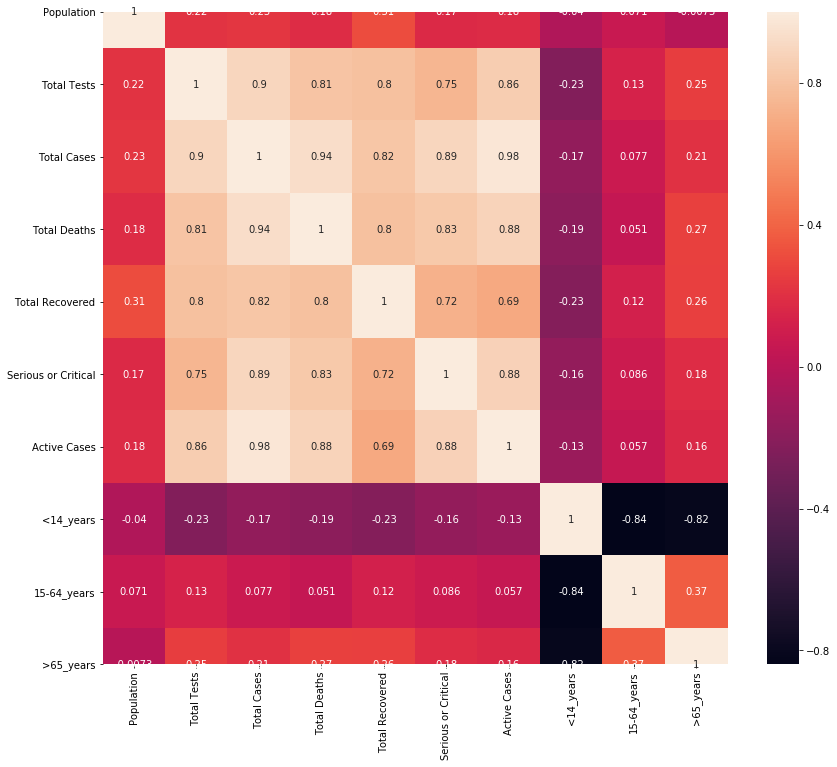

In [255]:
#Plotting correlation on heatmap for better clearance.
plt.figure(figsize=(14,12))
sns.heatmap(cor,annot=True)
plt.show()

Age ranges are highly negatively correlated with each other means covid increase in one age range people decreases in other age ranges.
'Population','Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases' are very very highly positively correlated with each other means like increase in population 'Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases' are increases and so on with every features.

In [256]:
#Adding Month and Day columns in the Dataset for better analysis.As it is the data since april-20 and 2020 is not ended till date so we do not take year column.
Data['Month']=Data['Date'].dt.month_name()
Data['Day']=Data['Date'].dt.day
Data

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years,Month,Day
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189000,0.657000,0.154000,April,18
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189000,0.657000,0.154000,April,19
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189000,0.657000,0.154000,April,20
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189000,0.657000,0.154000,April,21
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189000,0.657000,0.154000,April,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,May,14
6599,2020-05-15,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,May,15
6600,2020-05-16,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,May,16
6601,2020-05-17,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,May,17


In [257]:
#Dropping Date column
Data=Data.drop('Date',axis=1)
Data.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years,Month,Day
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,April,18
1,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,April,19
2,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,April,20
3,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,April,21
4,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,April,22


# Uni and Bivariate Analysis

In [258]:
Data['Country'].unique()

array(['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France',
       'Germany', 'Turkey', 'Iran', 'India', 'Peru', 'China', 'Canada',
       'Saudi Arabia', 'Belgium', 'Mexico', 'Chile', 'Netherlands',
       'Pakistan', 'Qatar', 'Ecuador', 'Switzerland', 'Belarus', 'Sweden',
       'Portugal', 'Singapore', 'Ireland', 'UAE', 'Bangladesh', 'Poland',
       'Ukraine', 'Indonesia', 'Romania', 'Israel', 'South Africa',
       'Japan', 'Colombia', 'Austria', 'Kuwait', 'Egypt',
       'Dominican Republic', 'Philippines', 'S. Korea', 'Denmark',
       'Serbia', 'Panama', 'Czechia', 'Argentina', 'Norway', 'Algeria',
       'Bahrain', 'Afghanistan', 'Australia', 'Morocco', 'Malaysia',
       'Kazakhstan', 'Finland', 'Nigeria', 'Moldova', 'Ghana', 'Oman',
       'Armenia', 'Bolivia', 'Luxembourg', 'Iraq', 'Hungary', 'Cameroon',
       'Azerbaijan', 'Thailand', 'Greece', 'Guinea', 'Uzbekistan',
       'Honduras', 'Sudan', 'Senegal', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'I

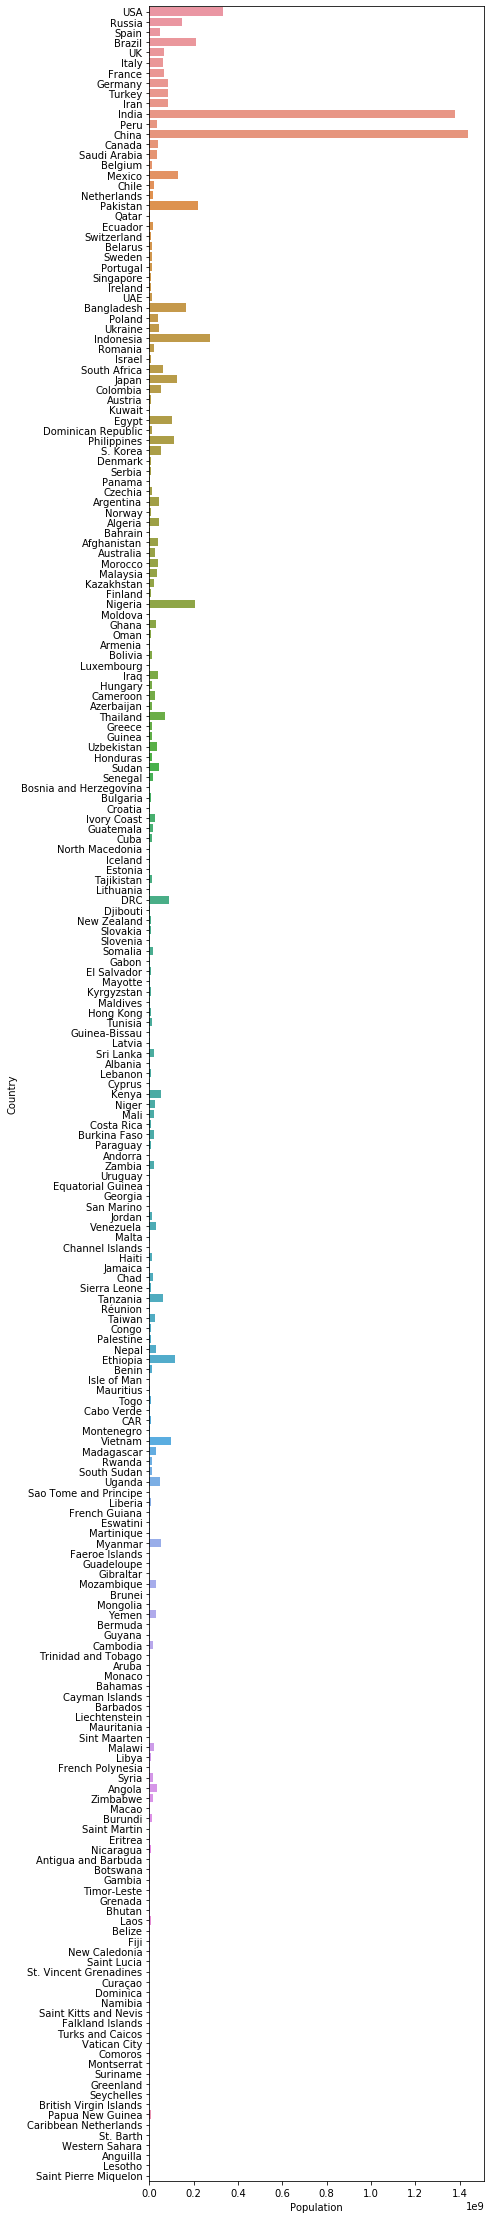

In [259]:
#Country wise Population
plt.figure(figsize=(6,40))
sns.barplot(x='Population',y='Country',data=Data)

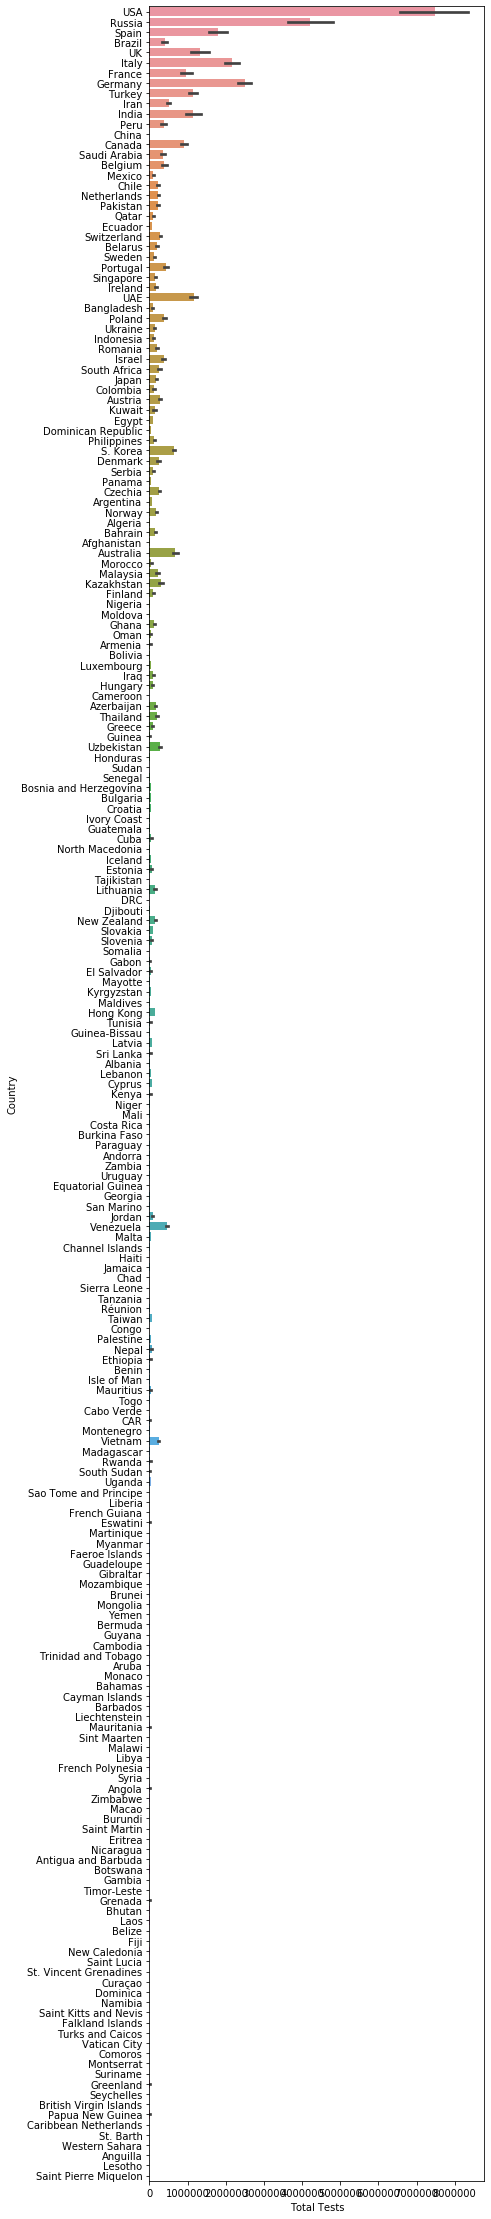

In [260]:
plt.figure(figsize=(6,40))
sns.barplot(x='Total Tests',y='Country',data=Data)

 USA have testted highest Total Tests followed by Russia,Germany,Italy,Spain,UK,India.

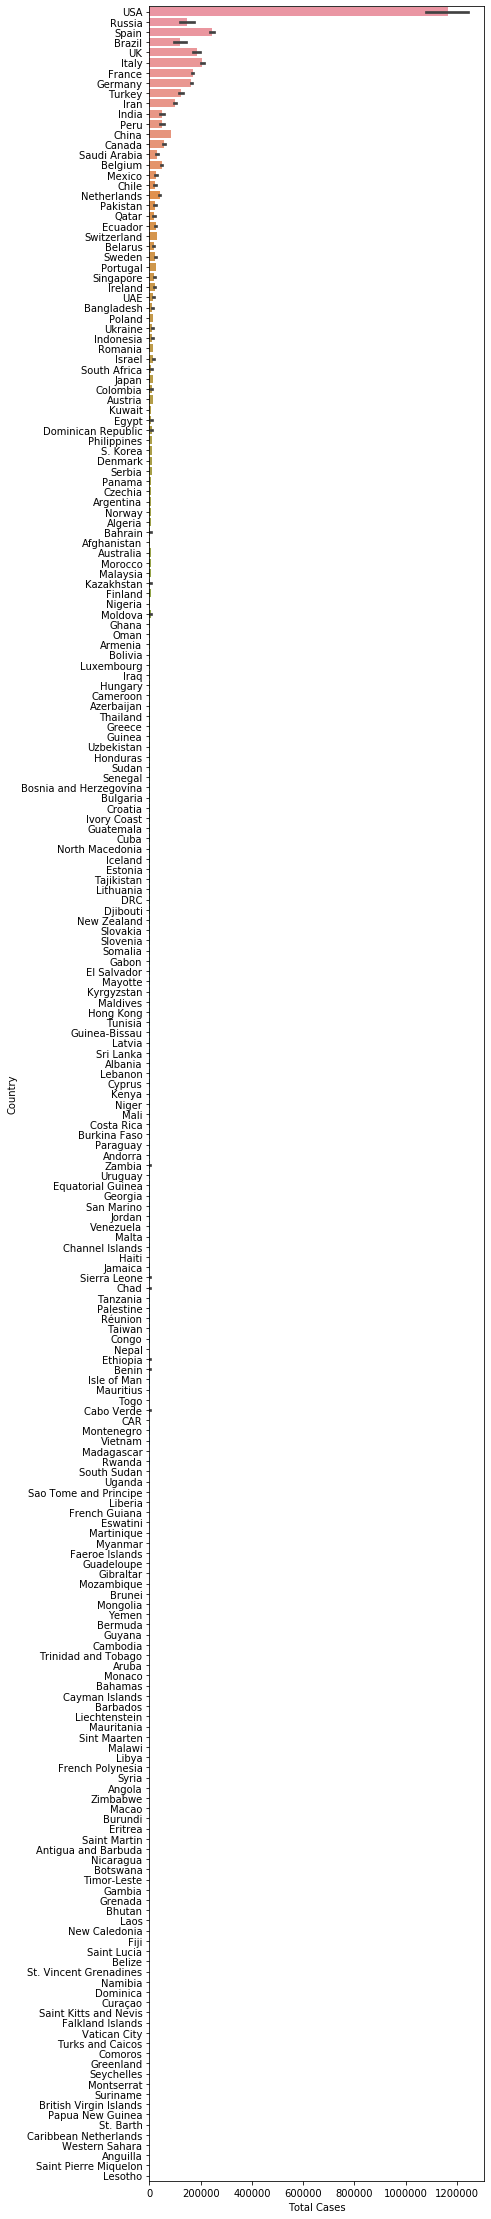

In [261]:
plt.figure(figsize=(6,40))
da=Data.sort_values(by='Total Cases',ascending=False)
sns.barplot(x='Total Cases',y='Country',data=da)

Total cases compared to all the countries USA has highest Cases.

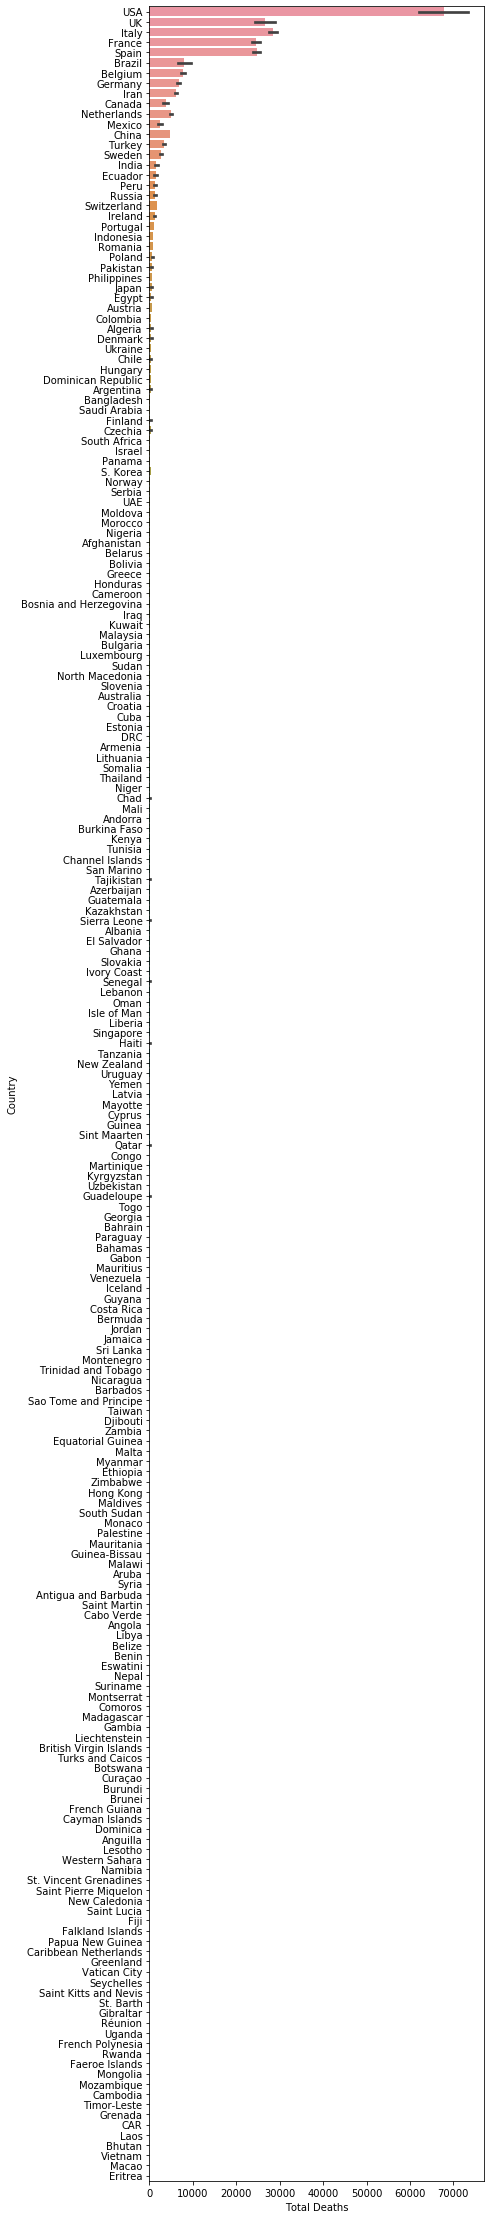

In [262]:
plt.figure(figsize=(6,40))
da=Data.sort_values(by='Total Deaths',ascending=False)
sns.barplot(x='Total Deaths',y='Country',data=da)

As the Total Cases are highest in USA so Total Deaths are also highest in USA.

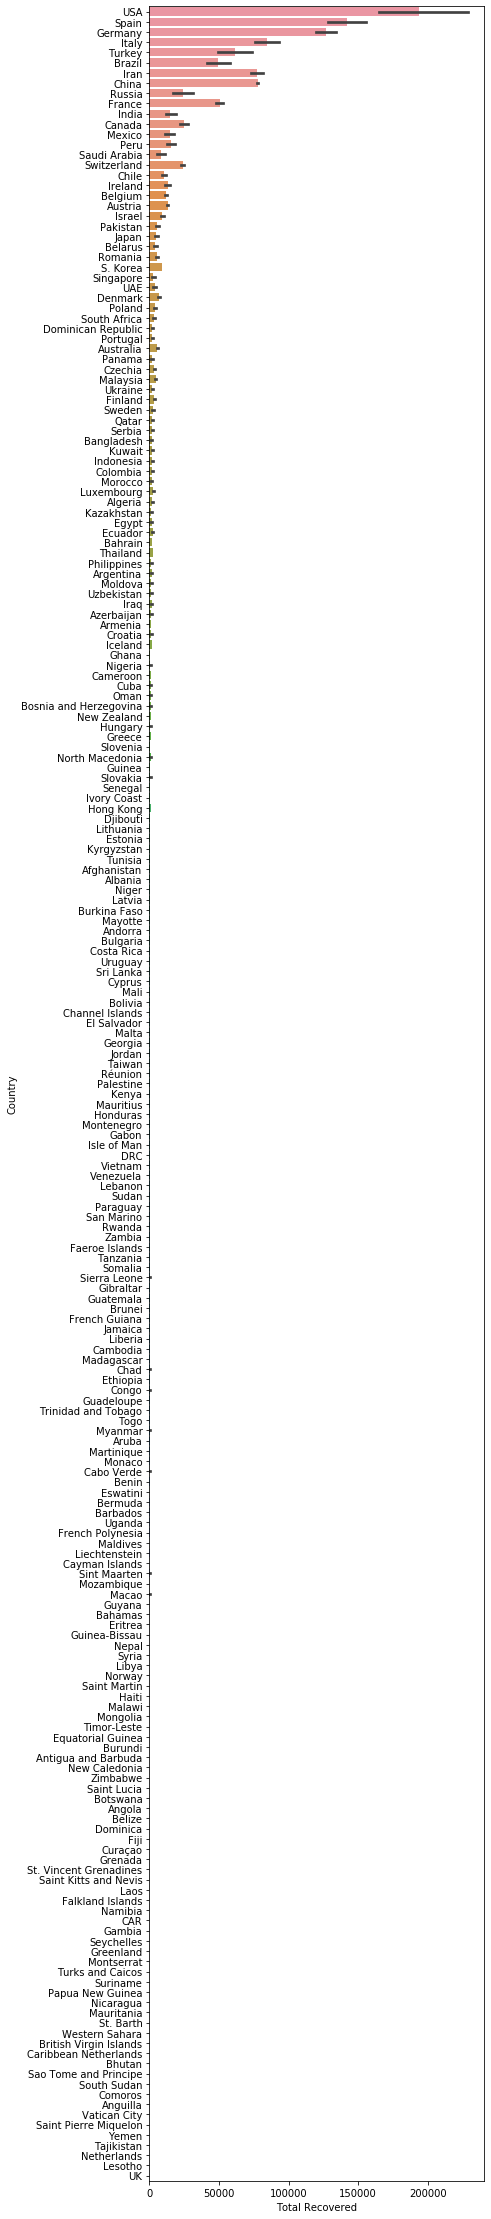

In [263]:
plt.figure(figsize=(6,40))
da=Data.sort_values(by='Total Recovered',ascending=False)
sns.barplot(x='Total Recovered',y='Country',data=da)

Total Recovered are also highest in USA followed by Spain,Italy,Germany

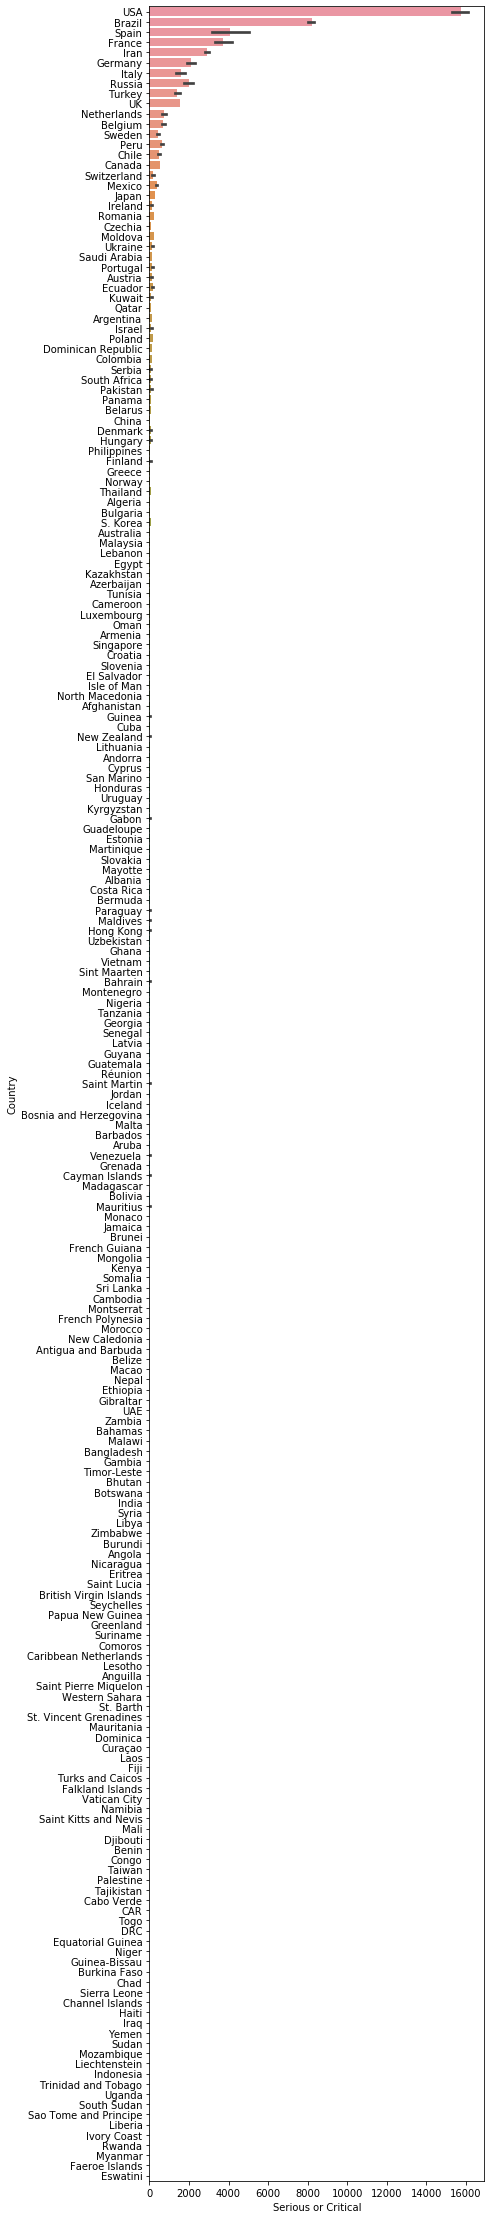

In [264]:
plt.figure(figsize=(6,40))
da=Data.sort_values(by='Serious or Critical',ascending=False)
sns.barplot(x='Serious or Critical',y='Country',data=da)

As the Total Cases are highest total Deaths are highest so Serious or Critical cases are also highest in USA.Serious or Critical cases followed by USA are Brazil,Spain,France,Iran,Germany.

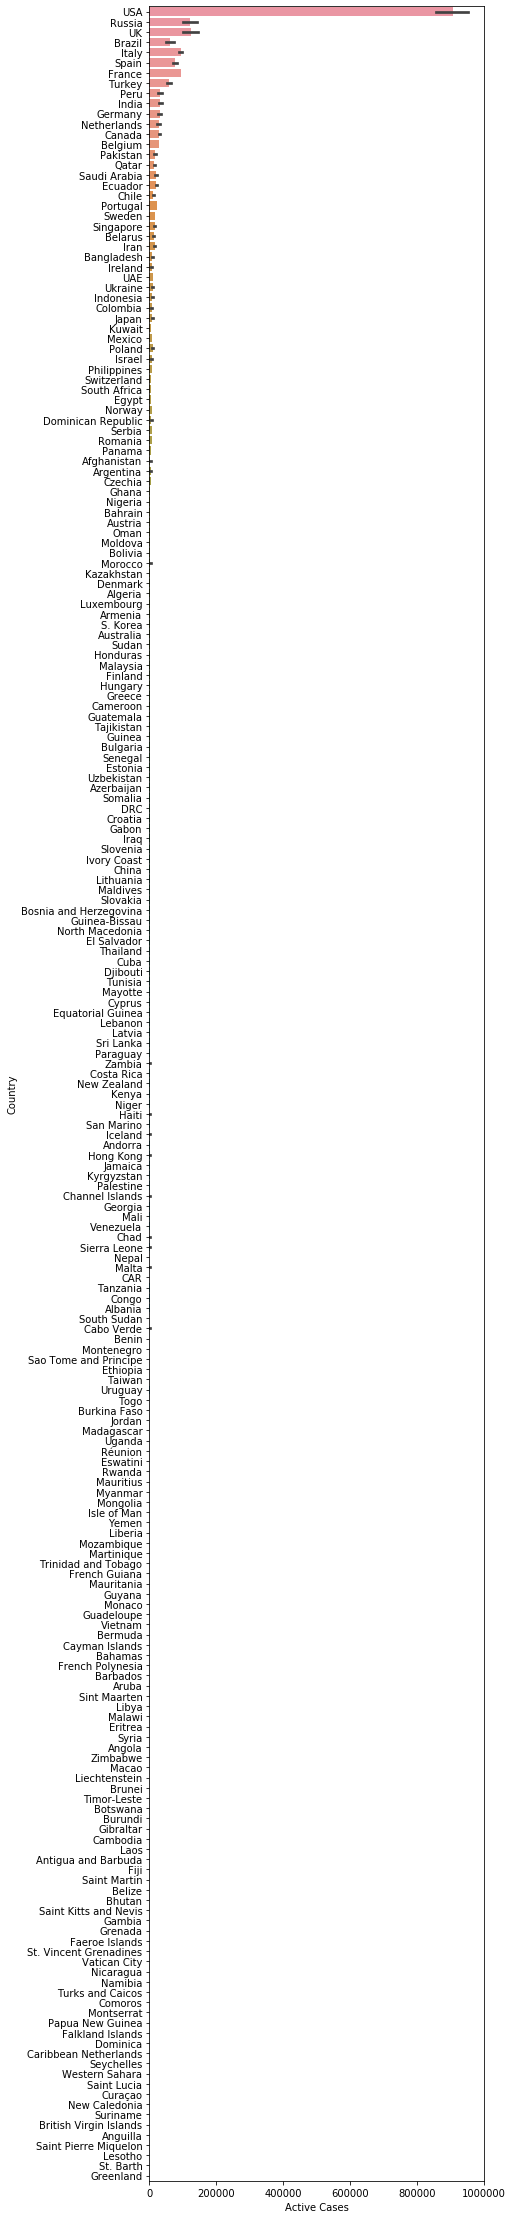

In [265]:
plt.figure(figsize=(6,40))
da=Data.sort_values(by='Active Cases',ascending=False)
sns.barplot(x='Active Cases',y='Country',data=da)

Till Date USA has highest Active Cases.

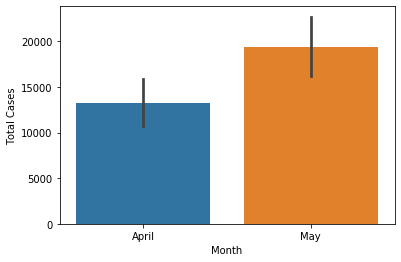

In [266]:
#Month and Total case
sns.barplot(x='Month',y='Total Cases',data=Data)

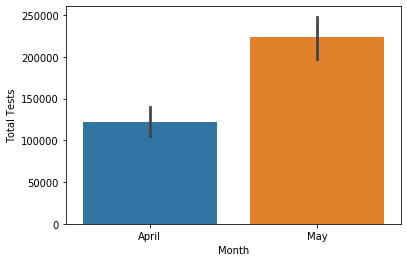

In [267]:
#Month and Total tests
sns.barplot(x='Month',y='Total Tests',data=Data)

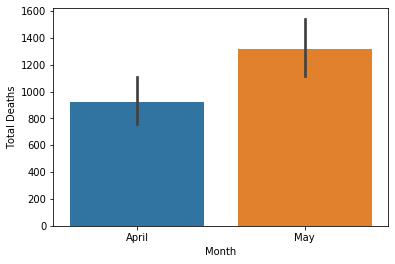

In [268]:
#Month and Total Deaths
sns.barplot(x='Month',y='Total Deaths',data=Data)

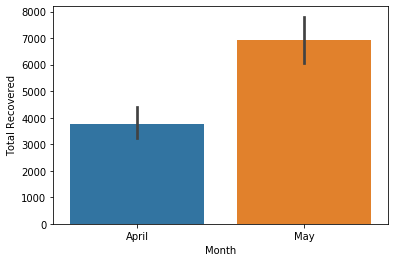

In [269]:
#Month and Total Recovered
sns.barplot(x='Month',y='Total Recovered',data=Data)

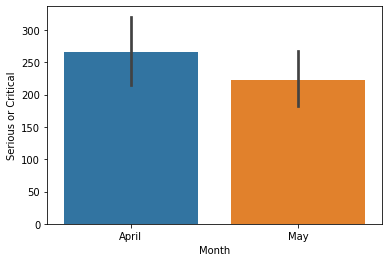

In [270]:
#Month and Serious or Critical
sns.barplot(x='Month',y='Serious or Critical',data=Data)

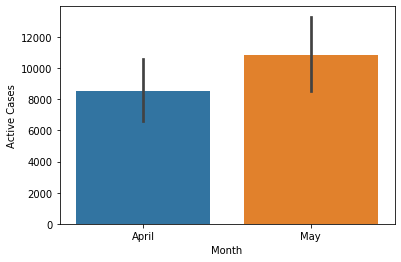

In [271]:
#Month and Active Cases
sns.barplot(x='Month',y='Active Cases',data=Data)

In may  'Total Tests', 'Total Cases', 'Total Deaths','Total Recovered' and 'Active Cases' all are higher than April Month but 'Serious or Critical' cases are highest in April.

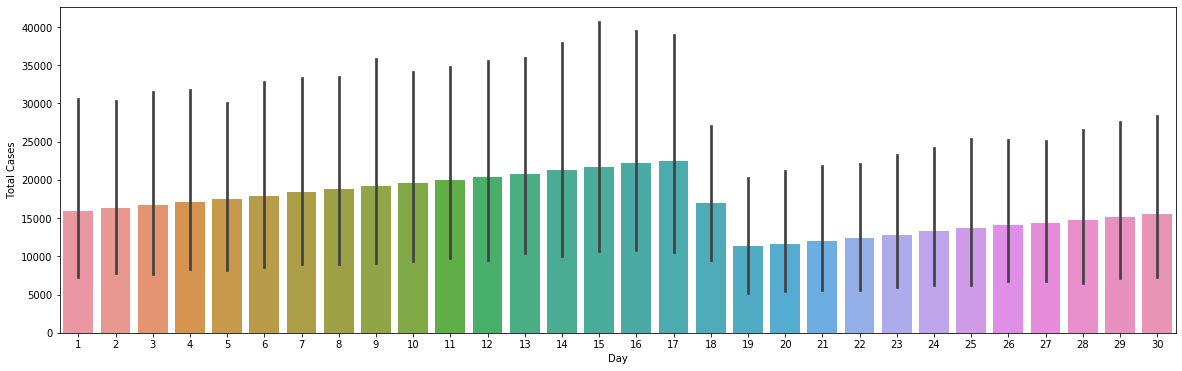

In [272]:
#Day and Total Cases
plt.figure(figsize=(20,6))
sns.barplot(x='Day',y='Total Cases',data=Data)

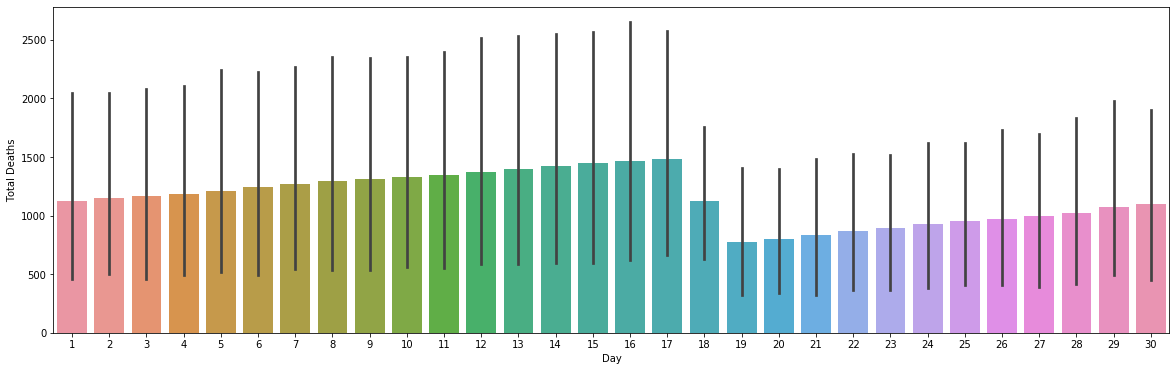

In [273]:
#Day and Total Deaths
plt.figure(figsize=(20,6))
sns.barplot(x='Day',y='Total Deaths',data=Data)

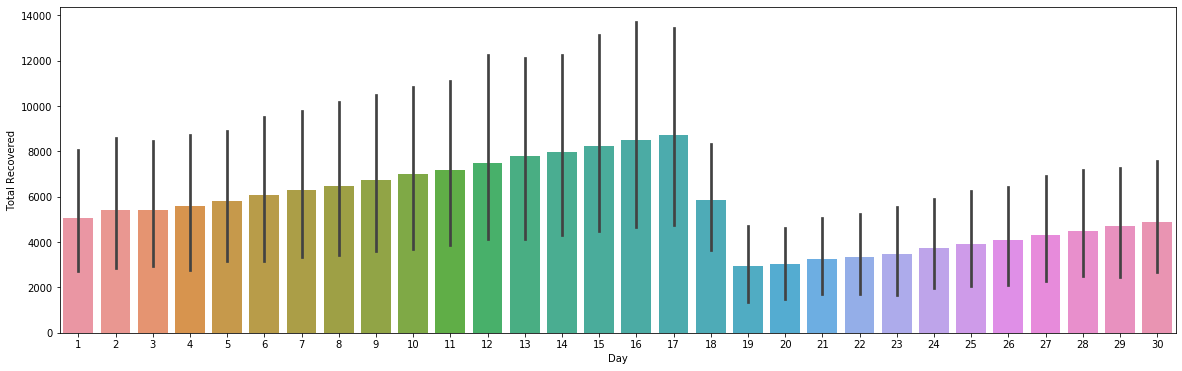

In [274]:
#Day and Total Recovered
plt.figure(figsize=(20,6))
sns.barplot(x='Day',y='Total Recovered',data=Data)

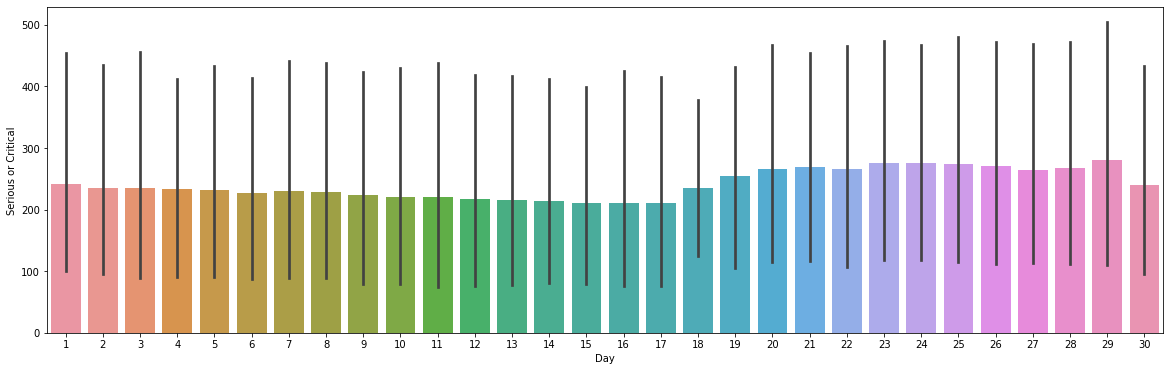

In [275]:
#Day and Serious or Critical
plt.figure(figsize=(20,6))
sns.barplot(x='Day',y='Serious or Critical',data=Data)

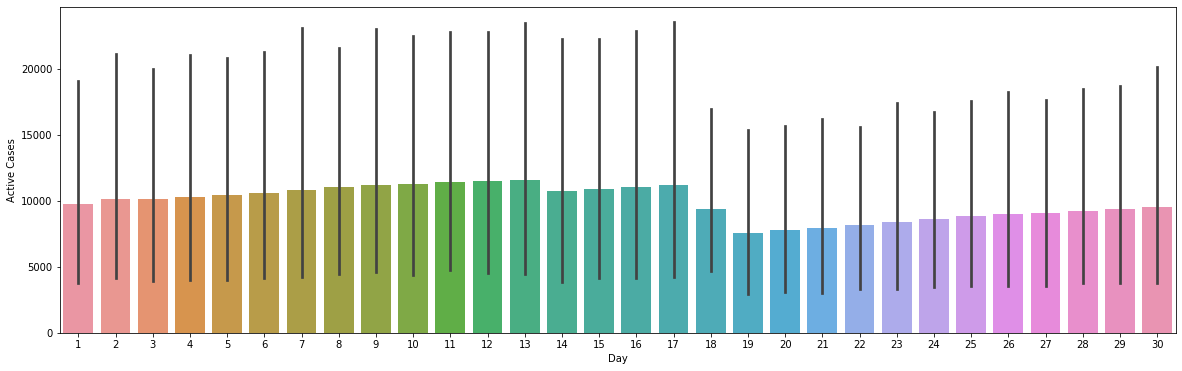

In [276]:
#Day and Active Cases
plt.figure(figsize=(20,6))
sns.barplot(x='Day',y='Active Cases',data=Data)

As it is the dataset collected from  18th of April 'Total Tests', 'Total Cases', 'Total Deaths','Total Recovered' and 'Active Cases' are gradually increased from 19th to month end and also gradually keep increaseing from day 1 to Day 17 in the next month and so on.But the Serious or Critical cases are higher from 19th to month end than Day 1 to Day 17 of next month.

In [277]:
#Adding columns Per Capita Penitration of virus as PCPV and Death Rate as Death_Rate
Data['PCPV']=Data['Total Cases']/Data['Population']
Data['Death_Rate']=(Data['Total Deaths']/Data['Total Cases'])*100
Data

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years,Month,Day,PCPV,Death_Rate
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189000,0.657000,0.154000,April,18,0.002234,5.280783
1,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189000,0.657000,0.154000,April,19,0.002309,5.309152
2,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189000,0.657000,0.154000,April,20,0.002397,5.362790
3,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189000,0.657000,0.154000,April,21,0.002475,5.535063
4,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189000,0.657000,0.154000,April,22,0.002566,5.615417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,May,14,0.000173,0.000000
6599,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,May,15,0.000173,0.000000
6600,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,May,16,0.000173,0.000000
6601,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,May,17,0.000173,0.000000


In [278]:
Data.isna().sum()

Country                 0
Population              0
Total Tests             0
Total Cases             0
Total Deaths            0
Total Recovered         0
Serious or Critical     0
Active Cases            0
<14_years               0
15-64_years             0
>65_years               0
Month                   0
Day                     0
PCPV                    0
Death_Rate             49
dtype: int64

In [279]:
#Dropping the observations with nan Death_Rate
Data=Data.dropna()
Data.Country.nunique()

213

In [280]:
Data.shape

(6554, 15)

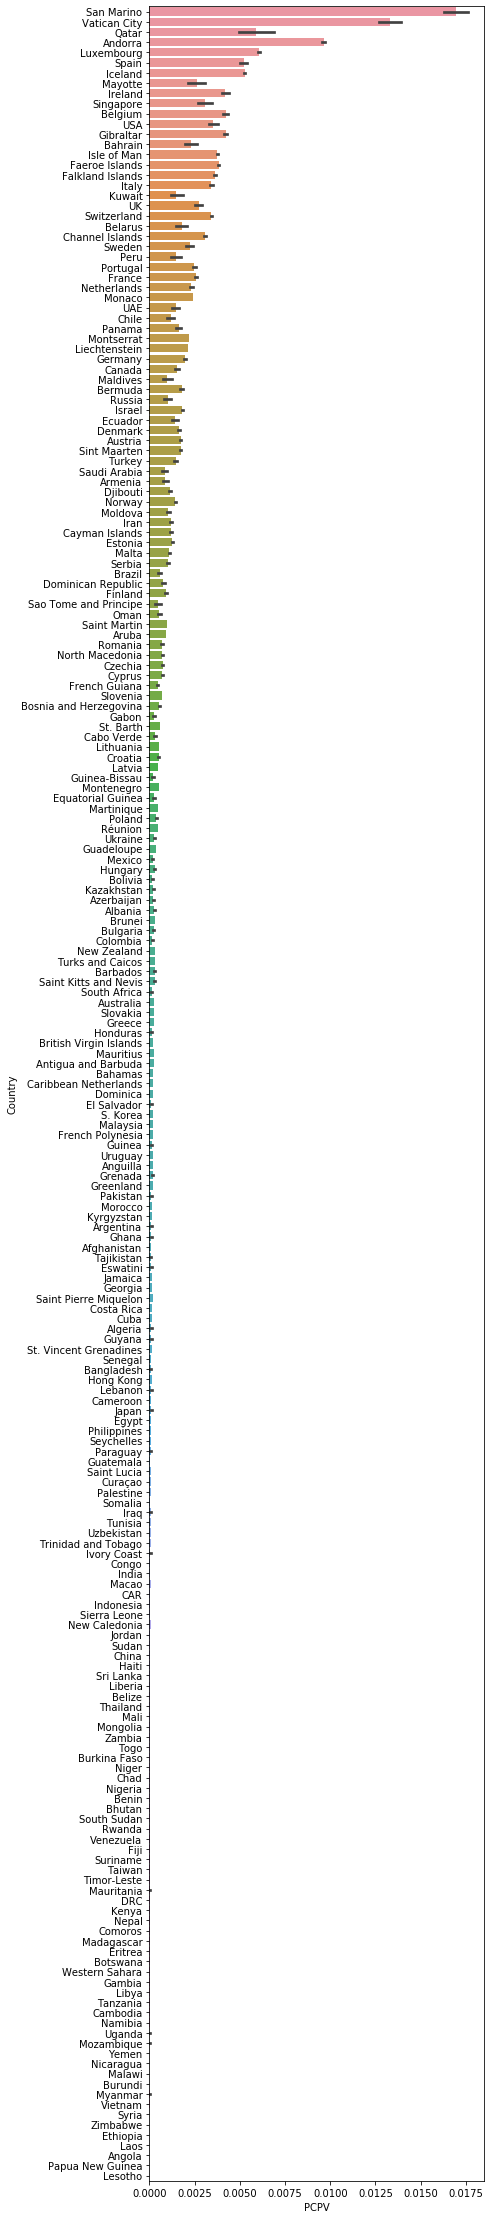

In [281]:
# Per Capita Penitration of virus
plt.figure(figsize=(6,40))
da=Data.sort_values(by='PCPV',ascending=False)
sns.barplot(x='PCPV',y='Country',data=da)
plt.show()

If we see country with Per Capita Penitration of virus then San Marina has highly affected with the virus followed by Vatican City,Andorra,Qatar,Luxembourg,Spain,Iceland.

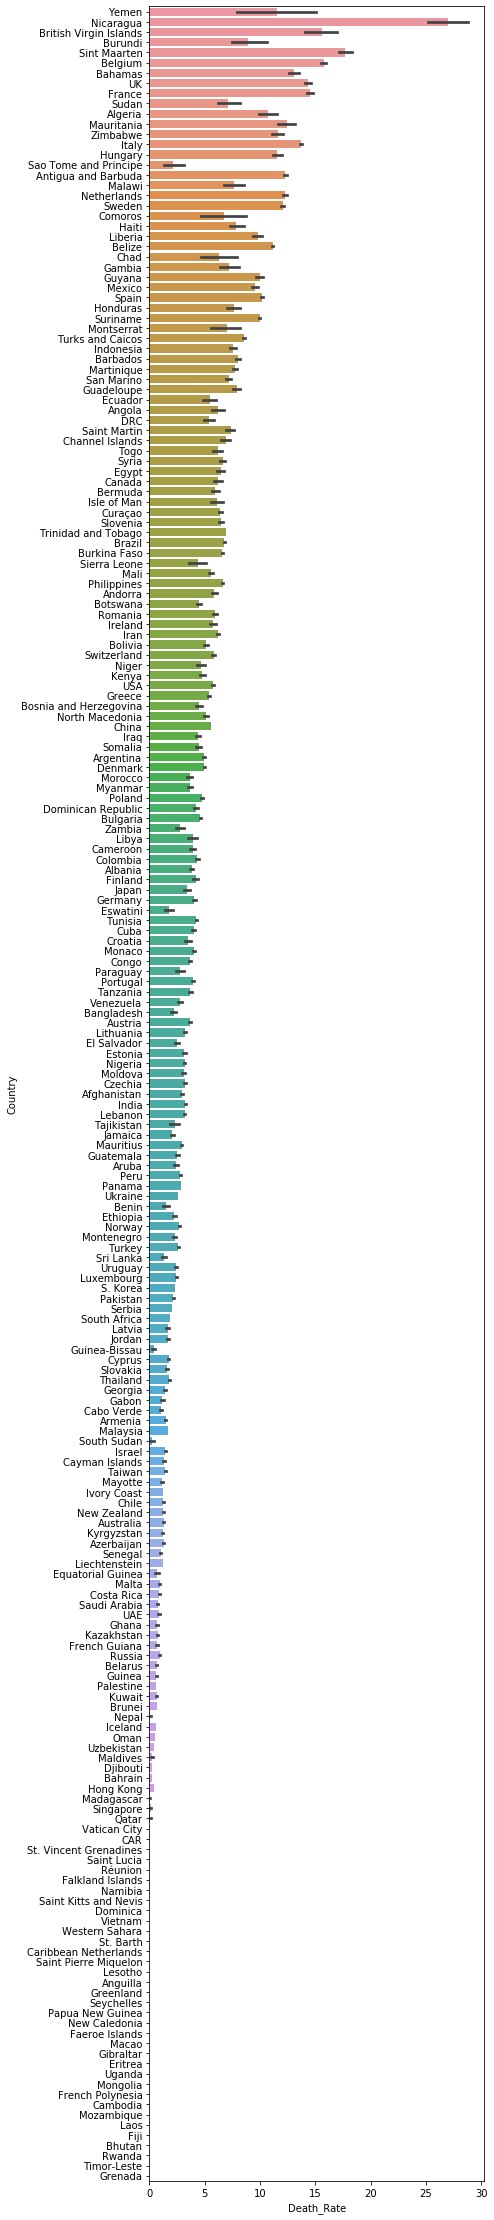

In [282]:
plt.figure(figsize=(6,40))
da=Data.sort_values(by='Death_Rate',ascending=False)
sns.barplot(x='Death_Rate',y='Country',data=da)
plt.show()

In [283]:
#Encoding the categorical values
cat=['Country','Month']
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for i in cat:
    Data[i]=Le.fit_transform(Data[i])

In [284]:
Data.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years,Month,Day,PCPV,Death_Rate
0,201,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,0,18,0.002234,5.280783
1,201,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,0,19,0.002309,5.309152
2,201,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,0,20,0.002397,5.362790
3,201,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,0,21,0.002475,5.535063
4,201,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,0,22,0.002566,5.615417


# Checking the Outliers

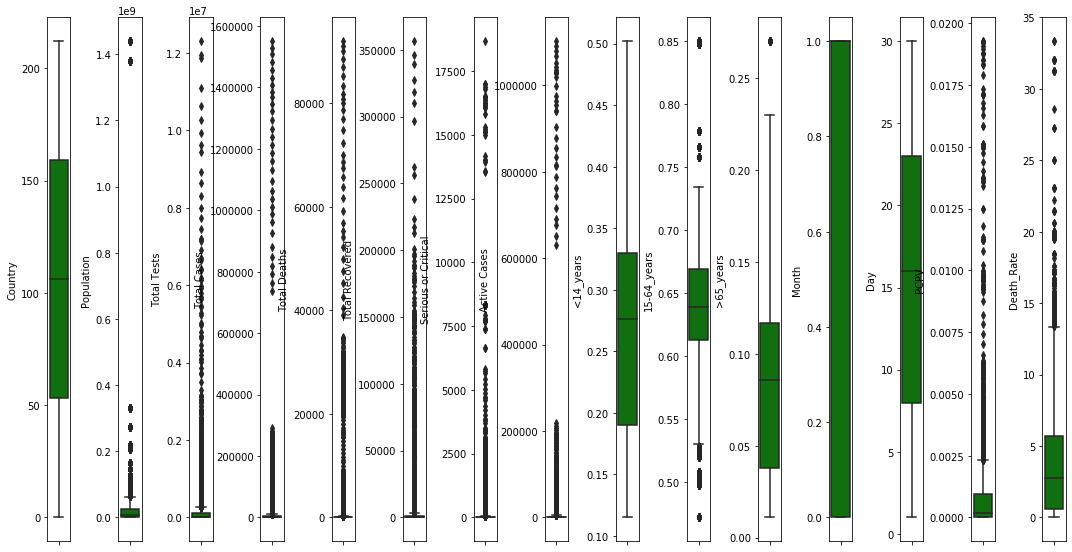

In [285]:
collist=Data.columns
col=15
row=10
plt.figure(figsize=(col,5*col))
for i in range(0,len(collist)):
    plt.subplot(row,col,i+1)
    sns.boxplot(Data[collist[i]],orient='v',color='green')
    plt.tight_layout()

Outliers are present in many columns lets remove them

In [286]:
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[1.54425933, 2.07673712, 5.0533852 , ..., 0.28730914, 0.67954252,
        0.32794984],
       [1.54425933, 2.07673712, 5.25237974, ..., 0.40465345, 0.71818643,
        0.33459796],
       [1.54425933, 2.07673712, 5.48764192, ..., 0.52199776, 0.76282909,
        0.34716774],
       ...,
       [0.95940823, 0.25852826, 0.25985205, ..., 0.05262053, 0.3725662 ,
        0.90956888],
       [0.95940823, 0.25852826, 0.25985205, ..., 0.16996483, 0.3725662 ,
        0.90956888],
       [0.95940823, 0.25852826, 0.25985205, ..., 0.28730914, 0.3725662 ,
        0.90956888]])

In [287]:
Data_ne=Data[(z<3).all(axis=1)]
Data_ne

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years,Month,Day,PCPV,Death_Rate
31,158,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176000,0.682000,0.142000,0,18,0.000252,0.850705
32,158,145927292,1940000.0,42853.0,361.0,3291.0,8.0,39201.0,0.176000,0.682000,0.142000,0,19,0.000294,0.842415
33,158,145927292,2053319.0,47121.0,405.0,3446.0,700.0,43270.0,0.176000,0.682000,0.142000,0,20,0.000323,0.859489
34,158,145927292,2142604.0,52763.0,456.0,3873.0,700.0,48434.0,0.176000,0.682000,0.142000,0,21,0.000362,0.864242
35,158,145927292,2250000.0,57999.0,513.0,4420.0,700.0,53066.0,0.176000,0.682000,0.142000,0,22,0.000397,0.884498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,165,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,1,14,0.000173,0.000000
6599,165,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,1,15,0.000173,0.000000
6600,165,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,1,16,0.000173,0.000000
6601,165,5797,0.0,1.0,0.0,1.0,0.0,0.0,0.276098,0.636109,0.087731,1,17,0.000173,0.000000


In [288]:
cols=Data.columns
for i in cols:
    print(Data[i].max())

212
1439323776
12300744.0
1550294.0
91981.0
356383.0
18671.0
1101930.0
0.502
0.85
0.27
1
30
0.019278955281077734
33.33333333333333


In [289]:
cols=Data.columns
for i in cols:
    print(Data[i].min())

0
801
0.0
1.0
0.0
0.0
0.0
0.0
0.115
0.472
0.011
0
1
3.362137776304265e-08
0.0


In [290]:
print("Highest Cases",Data['Total Cases'].max())
print("Lowest Cases",Data['Total Cases'].min())

Highest Cases 1550294.0
Lowest Cases 1.0


In [291]:
Data.isna().sum()

Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
<14_years              0
15-64_years            0
>65_years              0
Month                  0
Day                    0
PCPV                   0
Death_Rate             0
dtype: int64

As the Total Cases,Total Deaths,Total Recovered,Serious or Critical ,Active Cases are varies from 0 to very high so All are assumeed as Outlier.So skip it.

# Checking the Skewness of Distribution

In [292]:
Data.skew()

Country                -0.000076
Population              8.711241
Total Tests             9.270345
Total Cases            12.035097
Total Deaths            8.934963
Total Recovered         7.196599
Serious or Critical     9.211418
Active Cases           13.252082
<14_years               0.404700
15-64_years            -0.144910
>65_years               0.836788
Month                  -0.337396
Day                    -0.022065
PCPV                    4.918744
Death_Rate              1.924140
dtype: float64

'Population','Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases','>65_years','PCPV','Death_Rate' are highly right skewed

In [293]:
skewed=['Population','Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases','>65_years','PCPV','Death_Rate']
for i in skewed:
    Data[i]=np.sqrt(Data[i])

In [294]:
Data.skew()

Country               -0.000076
Population             3.991102
Total Tests            3.489564
Total Cases            4.771797
Total Deaths           4.748656
Total Recovered        3.774726
Serious or Critical    4.953255
Active Cases           6.055520
<14_years              0.404700
15-64_years           -0.144910
>65_years              0.373961
Month                 -0.337396
Day                   -0.022065
PCPV                   1.905848
Death_Rate             0.251408
dtype: float64

In [297]:
skewed2=['Population','Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases','PCPV']
for i in skewed2:
    Data[i]=np.sqrt(Data[i])
Data.skew()    

Country               -0.000076
Population             1.171159
Total Tests            1.003333
Total Cases            1.902759
Total Deaths           2.177820
Total Recovered        1.864583
Serious or Critical    1.936633
Active Cases           2.000568
<14_years              0.404700
15-64_years           -0.144910
>65_years              0.373961
Month                 -0.337396
Day                   -0.022065
PCPV                   0.754119
Death_Rate             0.251408
dtype: float64

In [299]:
skewed3=['Population','Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases','PCPV']
for i in skewed3:
    Data[i]=np.sqrt(Data[i])
Data.skew()

Country               -0.000076
Population             0.168552
Total Tests           -0.407909
Total Cases            0.929058
Total Deaths           0.143902
Total Recovered        0.421042
Serious or Critical    0.250758
Active Cases           0.374667
<14_years              0.404700
15-64_years           -0.144910
>65_years              0.373961
Month                 -0.337396
Day                   -0.022065
PCPV                   0.201688
Death_Rate             0.251408
dtype: float64

In [302]:
Data['Total Cases']=np.sqrt(Data['Total Cases'])
Data.skew()

Country               -0.000076
Population             0.168552
Total Tests           -0.407909
Total Cases            0.518003
Total Deaths           0.143902
Total Recovered        0.421042
Serious or Critical    0.250758
Active Cases           0.374667
<14_years              0.404700
15-64_years           -0.144910
>65_years              0.373961
Month                 -0.337396
Day                   -0.022065
PCPV                   0.201688
Death_Rate             0.251408
dtype: float64

In [303]:
Data.isna().sum()

Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
<14_years              0
15-64_years            0
>65_years              0
Month                  0
Day                    0
PCPV                   0
Death_Rate             0
dtype: int64

Dataset is ready for splitting into train test sets

In [305]:
df_x=Data.iloc[:,0:-1]
df_x

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years,Month,Day,PCPV
0,201,11.612923,6.627491,2.326926,3.748889,4.020480,3.284705,5.309424,0.189000,0.657000,0.392428,0,18,0.466255
1,201,11.612923,6.658022,2.331779,3.767063,4.040263,3.285160,5.330942,0.189000,0.657000,0.392428,0,19,0.468202
2,201,11.612923,6.692896,2.337202,3.789365,4.050038,3.296671,5.356637,0.189000,0.657000,0.392428,0,20,0.470382
3,201,11.612923,6.725785,2.341918,3.819740,4.119404,3.298588,5.369028,0.189000,0.657000,0.392428,0,21,0.472283
4,201,11.612923,6.753090,2.347187,3.843865,4.126361,3.298588,5.394367,0.189000,0.657000,0.392428,0,22,0.474410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,165,2.953931,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.276098,0.636109,0.296194,1,14,0.338532
6599,165,2.953931,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.276098,0.636109,0.296194,1,15,0.338532
6600,165,2.953931,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.276098,0.636109,0.296194,1,16,0.338532
6601,165,2.953931,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.276098,0.636109,0.296194,1,17,0.338532


In [306]:
y=Data.iloc[:,-1].values.reshape(-1,1)
y

array([[2.29799536],
       [2.30415966],
       [2.31576984],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [309]:
#Scaling the train dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,<14_years,15-64_years,>65_years,Month,Day,PCPV
0,1.544259,2.215483,2.145755,3.032347,2.823829,2.454139,2.830092,3.595646,-0.892924,0.340861,1.182739,-1.182783,0.287309,1.286402
1,1.544259,2.215483,2.163969,3.050481,2.845292,2.478253,2.830642,3.619677,-0.892924,0.340861,1.182739,-1.182783,0.404653,1.307157
2,1.544259,2.215483,2.184774,3.070749,2.871630,2.490169,2.844589,3.648373,-0.892924,0.340861,1.182739,-1.182783,0.521998,1.330405
3,1.544259,2.215483,2.204394,3.088373,2.907501,2.574723,2.846910,3.662212,-0.892924,0.340861,1.182739,-1.182783,0.639342,1.350664
4,1.544259,2.215483,2.220684,3.108062,2.935990,2.583203,2.846910,3.690511,-0.892924,0.340861,1.182739,-1.182783,0.756686,1.373345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,0.959408,-1.971156,-1.808022,-1.926469,-1.603390,-1.227697,-1.149354,-2.333947,0.006830,-0.004828,0.155357,0.845464,-0.182068,-0.075340
6550,0.959408,-1.971156,-1.808022,-1.926469,-1.603390,-1.227697,-1.149354,-2.333947,0.006830,-0.004828,0.155357,0.845464,-0.064724,-0.075340
6551,0.959408,-1.971156,-1.808022,-1.926469,-1.603390,-1.227697,-1.149354,-2.333947,0.006830,-0.004828,0.155357,0.845464,0.052621,-0.075340
6552,0.959408,-1.971156,-1.808022,-1.926469,-1.603390,-1.227697,-1.149354,-2.333947,0.006830,-0.004828,0.155357,0.845464,0.169965,-0.075340


# Now the Dataset is ready For Machine Learning to Predict the Death_Rate

In [310]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Max_r2_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    Lr=LinearRegression()
    Lr.fit(train_x,train_y)
    pred=Lr.predict(test_x)
    r2_scr=r2_score(pred,test_y)
    if r2_scr>Max_r2_score:
        Max_r2_score=r2_scr
        Final_r_state=r_state
    print('Max r2 score corresponding to ',Final_r_state,' is ',Max_r2_score)    

Max r2 score corresponding to  42  is  0.8222970532895503
Max r2 score corresponding to  42  is  0.8222970532895503
Max r2 score corresponding to  42  is  0.8222970532895503
Max r2 score corresponding to  42  is  0.8222970532895503
Max r2 score corresponding to  42  is  0.8222970532895503
Max r2 score corresponding to  42  is  0.8222970532895503
Max r2 score corresponding to  42  is  0.8222970532895503
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score corresponding to  49  is  0.8257622157947401
Max r2 score c

In [311]:
#Checking if the model is overfitting or underfitting
a_score=cross_val_score(Lr,x,y,scoring='r2',cv=5)
print(a_score)
print(np.mean(a_score))

[0.80736794 0.81966221 0.68262491 0.51426485 0.82630821]
0.7300456267112614


In [313]:
#Final LinearRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=49,test_size=0.25)
Lr.fit(train_x,train_y)
Lrpred=Lr.predict(test_x)
print('Predicted Death Rate',Lrpred)
print('R2 score',r2_score(Lrpred,test_y))
print('Mean Absolute error',mean_absolute_error(Lrpred,test_y))
print('Mean Squared error',mean_squared_error(Lrpred,test_y))

Predicted Death Rate [[ 1.80970732]
 [ 1.65072478]
 [ 2.83730732]
 ...
 [ 1.52618251]
 [ 1.69641727]
 [-0.40056307]]
R2 score 0.8257622157947401
Mean Absolute error 0.3215040026464931
Mean Squared error 0.18760496414360636


Checking the score by other algorithms

In [315]:
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','linear','poly']}
gd_sr=GridSearchCV(sv,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
print(gd_sr.best_params_)
print(gd_sr.best_score_)

{'kernel': 'rbf'}
0.9662401646772407


In [316]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mae','mse','friedman_mse']}
gd_sr=GridSearchCV(dt,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
print(gd_sr.best_params_)
print(gd_sr.best_score_)

{'criterion': 'friedman_mse'}
0.9921027986737743


In [317]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':[50,100,150,200,250,300]}
gd_sr=GridSearchCV(knn,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
print(gd_sr.best_params_)
print(gd_sr.best_score_)

{'n_neighbors': 50}
0.618910691582437


In [318]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param={'n_estimators':[50,100,150,200,250,300]}
gd_sr=GridSearchCV(rf,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
print(gd_sr.best_params_)
print(gd_sr.best_score_)

{'n_estimators': 100}
0.9970491650428912


In [319]:
from sklearn.ensemble import AdaBoostRegressor
Ada=AdaBoostRegressor()
param={'n_estimators':[50,100,150,200,250,300]}
gd_sr=GridSearchCV(Ada,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
print(gd_sr.best_params_)
print(gd_sr.best_score_)

{'n_estimators': 200}
0.8171427832295329


In [320]:
from sklearn.ensemble import GradientBoostingRegressor
Gbr=GradientBoostingRegressor()
param={'n_estimators':[50,100,150,200,250,300]}
gd_sr=GridSearchCV(Gbr,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
print(gd_sr.best_params_)
print(gd_sr.best_score_)

{'n_estimators': 300}
0.993420257697645


From all the models RandomForestRegressor has highest R2 score of 0.9970491650428912(99.70%). So we save the model and its prediction.

In [321]:
#Final Model
rf.fit(train_x,train_y)
RFPRED=rf.predict(test_x)
print('Death Rate prediction',RFPRED)
print('R2 score',r2_score(RFPRED,test_y))
print('Mean Absolute error',mean_absolute_error(RFPRED,test_y))
print('Mean Squared error',mean_squared_error(RFPRED,test_y))

Death Rate prediction [1.76692625 1.6288002  3.14206514 ... 1.13152073 1.22494562 0.        ]
R2 score 0.9974481099347108
Mean Absolute error 0.025690901938730214
Mean Squared error 0.003082616065454295


In [330]:
#Checking if  Over and underfitting
A_score=cross_val_score(rf,x,y,cv=5,scoring='r2')
print(A_score)
print(np.mean(A_score))

[0.36545202 0.49743957 0.82214833 0.56049669 0.89208756]
0.6275248310240423


In [331]:
test1=np.array([25,102533,45644,23222,2659,10123,26,10414,3,7,0,1,23,0.22]).reshape(1,-1)
rf.predict(test1)

array([2.57577016])

In [332]:
test2=np.array([5,322533,56644,11222,1259,9123,17,823,1,8,1,0,15,0.034]).reshape(1,-1)
rf.predict(test2)

array([2.57577016])

In [333]:
#Saving the prediction
df=pd.DataFrame(RFPRED)
df.to_csv('Covid_Death_Rate.csv')

In [335]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(rf,'Covid_Death_Rate.obj')

['Covid_Death_Rate.obj']